# IPhone Review dataset
About Dataset
Based on the dataset of iPhone reviews from Amazon, here are some project areas we can do:

-> Sentiment analysis: Determine overall sentiment and identify trends.

-> Feature analysis: Analyze user satisfaction with specific features.

-> Topic modeling: Discover underlying themes and discussion points.

In [ ]:
# Import necessary libraries
#!conda install -c conda-forge imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\iphone.csv")

In [3]:
df.head(2)

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [4]:
df.isna().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [5]:
(df.isna().sum()/df.shape[0])*100

productAsin          0.000000
country              0.000000
date                 0.000000
isVerified           0.000000
ratingScore          0.000000
reviewTitle          0.000000
reviewDescription    2.808622
reviewUrl            0.522534
reviewedIn           0.000000
variant              0.000000
variantAsin          0.000000
dtype: float64

In [6]:
df['review'] = df['reviewTitle'] + ' ' + df['reviewDescription']


In [7]:
df["ratingScore"].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [8]:
df=df.drop(columns=["productAsin","isVerified","country","date","reviewTitle","reviewDescription",
                    "reviewUrl","reviewedIn","variant","variantAsin"])

In [9]:
df.dtypes

ratingScore     int64
review         object
dtype: object

In [10]:
df.isnull().sum()

ratingScore     0
review         86
dtype: int64

In [11]:
df["review"].fillna('no comment ',inplace=True)

In [12]:
df.isnull().sum()

ratingScore    0
review         0
dtype: int64

In [13]:
df.dtypes

ratingScore     int64
review         object
dtype: object

In [14]:
df['length']=df['review'].apply(len)

In [15]:
df

,ratingScore,review,length
0,4,"No charger Every thing is good about iPhones, ...",445
1,5,"iPhone 13 256GB It look so fabulous, I am andr...",217
2,4,Flip camera option nill I tried to flip camera...,510
3,5,Product 100% genuine,20
4,5,Good product Happy to get the iPhone 13 in Ama...,55
...,...,...,...
3057,1,Very bad experience with i phone 13 Useless ph...,198
3058,2,not happy with this apple product iam not happ...,217
3059,3,Good phone Good phone,21
3060,1,Battery discharge While charging mobile it's g...,107


In [16]:
# statistical summary

In [17]:
df.describe()

,ratingScore,length
count,3062.000000,3062.000000
mean,3.758981,218.441215
std,1.579033,358.348834
min,1.000000,3.000000
25%,3.000000,45.250000
50%,5.000000,120.000000
75%,5.000000,242.750000
max,5.000000,3927.000000


C:\Users\uzuma\AppData\Local\Temp\ipykernel_1860\3858697360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["length"])


<Axes: xlabel='length', ylabel='Density'>

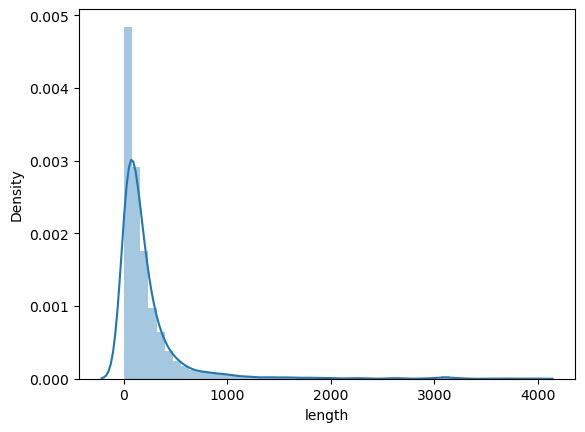

In [20]:
sns.distplot(df["length"])

In [21]:
df[df['length']>3000]

,ratingScore,review,length
78,5,Redefining Excellence: A Review of the iPhone ...,3094
111,4,Review after 1 week of usage Got it for 65K on...,3673
120,5,Using after 3 months honest review This is my ...,3092
123,4,Android to Apple Transition - Not a very smoot...,3119
133,5,Apple iPhone 13 (256GB) - Pink The Apple iPhon...,3073
458,5,The iPhone 13 is the new benchmark for flagshi...,3241
947,5,iPhone XR to iPhone 15 Just made the transitio...,3177
1201,3,Use an Iphone for a month before planning to b...,3135
1645,1,1st purchase was great! This one was not! I ha...,3927
2211,5,Redefining Excellence: A Review of the iPhone ...,3094


In [22]:
#Convert text data to lowercase 
df['review'] = df['review'].apply(lambda x: x.lower())



In [23]:
df

,ratingScore,review,length
0,4,"no charger every thing is good about iphones, ...",445
1,5,"iphone 13 256gb it look so fabulous, i am andr...",217
2,4,flip camera option nill i tried to flip camera...,510
3,5,product 100% genuine,20
4,5,good product happy to get the iphone 13 in ama...,55
...,...,...,...
3057,1,very bad experience with i phone 13 useless ph...,198
3058,2,not happy with this apple product iam not happ...,217
3059,3,good phone good phone,21
3060,1,battery discharge while charging mobile it's g...,107


In [24]:
#cleaning of text column in data

In [25]:
df.head()

,ratingScore,review,length
0,4,"no charger every thing is good about iphones, ...",445
1,5,"iphone 13 256gb it look so fabulous, i am andr...",217
2,4,flip camera option nill i tried to flip camera...,510
3,5,product 100% genuine,20
4,5,good product happy to get the iphone 13 in ama...,55


In [26]:
print("Mean length",df["length"].mean())
print("Median length",df["length"].median())
print("Standard Deviation",df["length"].std())
print("Minimum length",df["length"].min())
print("Maximum length",df["length"].max())

Mean length 218.4412148922273
Median length 120.0
Standard Deviation 358.3488336967031
Minimum length 3
Maximum length 3927


In [27]:
df[df["length"]==3927]["review"].iloc[0]

'1st purchase was great! this one was not! i have had this iphone for 38 days.it has the worst battery life of any iphone i\'ve ever owned, and i have owned only iphones since the first version was released 17 years ago.this is the second iphone 14 that i\'ve bought from the renewed store .the first one i bought on december 4th, 2023, and i could not have been happier with the phone.it arrived in brand new condition, and performed flawlessly.on the recommendation of a friend, i checked the battery health and charging after having it for months and it was at 100%! i was thrilled!i absolutely loved the phone!i never had a single problem with it.unfortunately, on july 30 of this year i dropped it, and it was beyond repair.i immediately went back to the amazon renewed store and purchased another iphone 14 because my experience with the first one was so fantastic.it arrived in new looking condition, exactly like the one i bought in december 2023.it was not scratched or anything really notic

In [28]:
df[df["length"]==3]["review"].iloc[0]

'🥰 🥰'

In [29]:
df

,ratingScore,review,length
0,4,"no charger every thing is good about iphones, ...",445
1,5,"iphone 13 256gb it look so fabulous, i am andr...",217
2,4,flip camera option nill i tried to flip camera...,510
3,5,product 100% genuine,20
4,5,good product happy to get the iphone 13 in ama...,55
...,...,...,...
3057,1,very bad experience with i phone 13 useless ph...,198
3058,2,not happy with this apple product iam not happ...,217
3059,3,good phone good phone,21
3060,1,battery discharge while charging mobile it's g...,107


In [30]:
import re
import nltk
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words=stopwords.words("english")

In [33]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
len(stop_words)

179

In [35]:
df.head(1)

,ratingScore,review,length
0,4,"no charger every thing is good about iphones, ...",445


In [36]:
df["review"]=df["review"].str.lower()

In [37]:
df["review"]

0       no charger every thing is good about iphones, ...
1       iphone 13 256gb it look so fabulous, i am andr...
2       flip camera option nill i tried to flip camera...
3                                    product 100% genuine
4       good product happy to get the iphone 13 in ama...
                              ...                        
3057    very bad experience with i phone 13 useless ph...
3058    not happy with this apple product iam not happ...
3059                                good phone good phone
3060    battery discharge while charging mobile it's g...
3061    batter power needs to be improved battery powe...
Name: review, Length: 3062, dtype: object

In [38]:
ls=[]

for i in df["review"][0].split():
    if i not in stop_words:
        ls.append(i)

In [39]:
ls

['charger',
 'every',
 'thing',
 'good',
 'iphones,',
 "there's",
 'nothing',
 'compared',
 'speed',
 'ios',
 'disappointed',
 "there's",
 'charger',
 'even',
 'though',
 'indian',
 'judiciary',
 'told',
 'provide',
 ',',
 'still',
 'made',
 'progress',
 'regarding',
 'charger.',
 'spend',
 '62k',
 'iphones',
 'brand',
 'acessories',
 'comfort',
 'size',
 'features',
 'right',
 "that's",
 "what's",
 'point',
 'buying',
 'iphone.thank',
 'you🙏']

In [40]:
" ".join(ls)

"charger every thing good iphones, there's nothing compared speed ios disappointed there's charger even though indian judiciary told provide , still made progress regarding charger. spend 62k iphones brand acessories comfort size features right that's what's point buying iphone.thank you🙏"

In [41]:
def stop_word_clean(x):
    return " ".join([words for words in str(x).split() if words not in stop_words])

In [42]:
df["review"]=df["review"].apply(lambda x: stop_word_clean(x))

In [43]:
df

,ratingScore,review,length
0,4,"charger every thing good iphones, there's noth...",445
1,5,"iphone 13 256gb look fabulous, android user sw...",217
2,4,flip camera option nill tried flip camera reco...,510
3,5,product 100% genuine,20
4,5,good product happy get iphone 13 amazon offer,55
...,...,...,...
3057,1,bad experience phone 13 useless phon never buy...,198
3058,2,happy apple product iam happy product charger ...,217
3059,3,good phone good phone,21
3060,1,battery discharge charging mobile getting hot ...,107


In [44]:
df["after_stop"]=df["review"].apply(len)

In [45]:
df.head(1)

,ratingScore,review,length,after_stop
0,4,"charger every thing good iphones, there's noth...",445,288


In [46]:





def removal_url(review):
    return re.sub('https?://(?:www\.)?[\w\.-]+\.[a-zA-Z]{2,}(?:/[\w\.-]*)*/?','',review)

In [47]:
df["review"]=df["review"].apply(lambda x: removal_url(x))

In [48]:
df["after_url"]= df["review"].apply(len)
df.head(1)

,ratingScore,review,length,after_stop,after_url
0,4,"charger every thing good iphones, there's noth...",445,288,288


In [49]:
print(df["after_url"].max())

2589


In [50]:
def removal_username(review):
    return re.sub('@[^\s]+','',review)

In [51]:
df["review"]=df["review"].apply(lambda x: removal_username(x))

In [52]:
df["after_username"]= df["review"].apply(len)
df.head(1)

,ratingScore,review,length,after_stop,after_url,after_username
0,4,"charger every thing good iphones, there's noth...",445,288,288,288


In [53]:
def removal_number(review):
    return re.sub('[0-9]+','',review)

In [54]:
df["review"]=df["review"].apply(lambda x: removal_number(x))

In [55]:
df["after_number"]= df["review"].apply(len)

In [56]:
df.head(1)

,ratingScore,review,length,after_stop,after_url,after_username,after_number
0,4,"charger every thing good iphones, there's noth...",445,288,288,288,286


In [57]:
def removal_extraspace(review):
    return re.sub('\s+',' ',review)

In [58]:
df["review"]=df["review"].apply(lambda x: removal_extraspace(x))
df["after_white_space"]= df["review"].apply(len)
df.head(2)

,ratingScore,review,length,after_stop,after_url,after_username,after_number,after_white_space
0,4,"charger every thing good iphones, there's noth...",445,288,288,288,286,286
1,5,"iphone gb look fabulous, android user switched...",217,166,166,166,159,158


In [59]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [60]:
df["review"]=df["review"].apply(lambda x: deEmojify(x))
df["after_deEmojify"]= df["review"].apply(len)
df.head(2)

,ratingScore,review,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify
0,4,"charger every thing good iphones, there's noth...",445,288,288,288,286,286,285
1,5,"iphone gb look fabulous, android user switched...",217,166,166,166,159,158,155


In [61]:
print(df["after_white_space"].max())
print(df["after_deEmojify"].max())

2546
2546


In [62]:
def removal_xhtml(review):
    pattern= re.compile(r"quot")
    return re.sub(pattern,"",review)

In [63]:
df["review"]=df["review"].apply(lambda x: removal_xhtml(x))
df["after_removal_xhtml"]= df["review"].apply(len)
df.head(2)

,ratingScore,review,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify,after_removal_xhtml
0,4,"charger every thing good iphones, there's noth...",445,288,288,288,286,286,285,285
1,5,"iphone gb look fabulous, android user switched...",217,166,166,166,159,158,155,155


In [64]:
import string

In [65]:
punc=string.punctuation

In [66]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
def removal_punc(review):
    trans=str.maketrans('','',punc)
    return review.translate(trans)

In [68]:
df["review"]=df["review"].apply(lambda x: removal_punc(x))
df["after_punctuation"]= df["review"].apply(len)
df.head(2)

,ratingScore,review,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify,after_removal_xhtml,after_punctuation
0,4,charger every thing good iphones theres nothin...,445,288,288,288,286,286,285,285,277
1,5,iphone gb look fabulous android user switched ...,217,166,166,166,159,158,155,155,151


In [69]:
df["after_punctuation"].max()

2444

In [70]:
df[df["after_punctuation"]==2444]['review'].iloc[0]

'st purchase great one not iphone daysit worst battery life iphone ive ever owned owned iphones since first version released years agothis second iphone ive bought renewed store the first one bought december th  could happier phoneit arrived brand new condition performed flawlesslyon recommendation friend checked battery health charging months  thrilledi absolutely loved phonei never single problem itunfortunately july year dropped it beyond repairi immediately went back amazon renewed store purchased another iphone experience first one fantasticit arrived new looking condition exactly like one bought december it scratched anything really noticeable seemed worn little bit fully understood renewed phone cosmetic issues important me including color which iphone case cannot tell color anywayunfortunately look battery health charging first got phone days ago look two weeks ago said i thought ok renewed phone going  battery lifei live thatwell looked today  battery health chargingso phone d

In [71]:
df.isna().sum()

ratingScore            0
review                 0
length                 0
after_stop             0
after_url              0
after_username         0
after_number           0
after_white_space      0
after_deEmojify        0
after_removal_xhtml    0
after_punctuation      0
dtype: int64

In [72]:
df["after_punctuation"].min()

1

In [73]:
df.duplicated().sum()

683

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
df.duplicated().sum()

0

In [76]:
df

,ratingScore,review,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify,after_removal_xhtml,after_punctuation
0,4,charger every thing good iphones theres nothin...,445,288,288,288,286,286,285,285,277
1,5,iphone gb look fabulous android user switched ...,217,166,166,166,159,158,155,155,151
2,4,flip camera option nill tried flip camera reco...,510,329,329,329,329,329,329,329,321
3,5,product genuine,20,20,20,20,17,17,17,17,16
4,5,good product happy get iphone amazon offer,55,45,45,45,43,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...
3057,1,bad experience phone useless phon never buy he...,198,155,155,155,151,148,148,148,148
3058,2,happy apple product iam happy product charger ...,217,138,138,138,138,138,138,138,135
3059,3,good phone good phone,21,21,21,21,21,21,21,21,21
3060,1,battery discharge charging mobile getting hot ...,107,79,79,79,79,79,79,79,79


In [77]:
drop_index=df[df["after_punctuation"]==df["after_punctuation"].min()][["review"]].index

In [78]:
drop_index

Index([293, 770, 797, 866], dtype='int64')

In [79]:
df.drop(drop_index,inplace=True)

In [80]:
df.shape

(2375, 11)

In [81]:
df.drop(df.columns[3:],axis=1,inplace=True)

In [82]:
df

,ratingScore,review,length
0,4,charger every thing good iphones theres nothin...,445
1,5,iphone gb look fabulous android user switched ...,217
2,4,flip camera option nill tried flip camera reco...,510
3,5,product genuine,20
4,5,good product happy get iphone amazon offer,55
...,...,...,...
3057,1,bad experience phone useless phon never buy he...,198
3058,2,happy apple product iam happy product charger ...,217
3059,3,good phone good phone,21
3060,1,battery discharge charging mobile getting hot ...,107


In [83]:
df.drop(columns=["length"],axis=1,inplace=True)

In [84]:
df

,ratingScore,review
0,4,charger every thing good iphones theres nothin...
1,5,iphone gb look fabulous android user switched ...
2,4,flip camera option nill tried flip camera reco...
3,5,product genuine
4,5,good product happy get iphone amazon offer
...,...,...
3057,1,bad experience phone useless phon never buy he...
3058,2,happy apple product iam happy product charger ...
3059,3,good phone good phone
3060,1,battery discharge charging mobile getting hot ...


In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [86]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [87]:
se=SentimentIntensityAnalyzer()

def get_sentiment(review):
    score=se.polarity_scores(review)
    if score["compound"] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [88]:
df["Sentiment"]=df["review"].apply(get_sentiment)

In [89]:
print(df[['review','Sentiment']])

                                                 review Sentiment
0     charger every thing good iphones theres nothin...  Positive
1     iphone gb look fabulous android user switched ...  Positive
2     flip camera option nill tried flip camera reco...  Positive
3                                      product  genuine   Neutral
4            good product happy get iphone amazon offer  Positive
...                                                 ...       ...
3057  bad experience phone useless phon never buy he...  Negative
3058  happy apple product iam happy product charger ...  Positive
3059                              good phone good phone  Positive
3060  battery discharge charging mobile getting hot ...   Neutral
3061  batter power needs improved battery power bad ...  Negative

[2375 rows x 2 columns]


In [91]:
import matplotlib.pyplot as plt

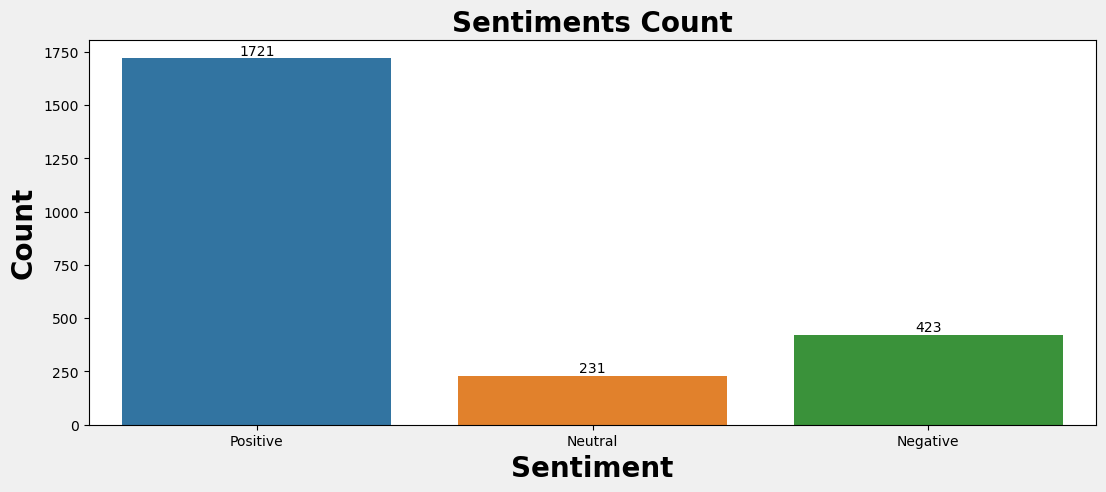

In [92]:
plt.figure(figsize=(13,5))
axes=sns.countplot(x="Sentiment",data=df)
plt.title('Sentiments Count',fontweight='bold',size=20)
plt.xlabel('Sentiment',fontweight='bold',size=20)
plt.ylabel('Count',fontweight='bold',size=20)
plt.gcf().set_facecolor('#F0F0F0')
for bars in axes.containers:
    axes.bar_label(bars)
plt.show()

In [93]:
#pip install pandas numpy gensim nltk pyLDAvis

In [94]:
df["Sentiment"]=df["Sentiment"].map({'Neutral':0,'Positive':1,'Negative':2})

In [95]:
df

,ratingScore,review,Sentiment
0,4,charger every thing good iphones theres nothin...,1
1,5,iphone gb look fabulous android user switched ...,1
2,4,flip camera option nill tried flip camera reco...,1
3,5,product genuine,0
4,5,good product happy get iphone amazon offer,1
...,...,...,...
3057,1,bad experience phone useless phon never buy he...,2
3058,2,happy apple product iam happy product charger ...,1
3059,3,good phone good phone,1
3060,1,battery discharge charging mobile getting hot ...,0


In [96]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [97]:
from nltk.stem import WordNetLemmatizer

In [98]:
wnl=WordNetLemmatizer()

In [101]:
print(df["Sentiment"].value_counts())

Sentiment
1    1721
2     423
0     231
Name: count, dtype: int64


In [102]:
x=df["review"]
y=df["Sentiment"]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
print(f"Original x shape: {len(x)}")
print(f"Original y shape: {len(y)}")

Original x shape: 2375
Original y shape: 2375


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [106]:
#Initialize TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2000)

In [107]:
# Fit and Trabsform training data
x_train_tfidf=vectorizer.fit_transform(x_train)

In [108]:
# Initializer RandomUnderSampler
rus=RandomUnderSampler(random_state=42)

In [109]:
# Resample training data
x_res,y_res=rus.fit_resample(x_train_tfidf,y_train)

In [110]:
#print original and resampled shapes 
print("Original sahpe:",x_train_tfidf.shape,y_train.shape)
print("Resampled shape:",x_res.shape,y_res.shape)

Original sahpe: (1900, 2000) (1900,)
Resampled shape: (537, 2000) (537,)


In [112]:
# Train a Naive Bayes classifier on resampled data
nb=MultinomialNB()
nb.fit(x_res,y_res)

MultinomialNB()

In [113]:
# MAke the prediction on test data
y_pred=nb.predict(vectorizer.transform(x_test))

In [114]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8168421052631579
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64        52
           1       0.95      0.84      0.89       340
           2       0.57      0.82      0.67        83

    accuracy                           0.82       475
   macro avg       0.72      0.77      0.73       475
weighted avg       0.85      0.82      0.83       475

Confusion Matrix:
[[ 34   7  11]
 [ 13 286  41]
 [  7   8  68]]


In [118]:
# Get user input

new_review=input("Enter a review:")

Enter a review:good product happy get iphone amazon offer


In [119]:
# Transform the new review into a numerical representation
new_review_tfidf = vectorizer.transform([new_review])


In [120]:
 #Make a prediction on the new review
prediction = nb.predict(new_review_tfidf)

# Print the predicted label
print("Predicted label:", prediction[0])

# Print the predicted probabilities
predicted_probabilities = nb.predict_proba(new_review_tfidf)
print("Predicted probabilities:", predicted_probabilities[0])

Predicted label: 1
Predicted probabilities: [0.14242001 0.65325599 0.204324  ]


In [123]:
# checking with new review

new_review=input("Enter a review:")

Enter a review:It’s particularly bad with prepositions and tense


In [124]:
new_review_tfidf = vectorizer.transform([new_review])
prediction = nb.predict(new_review_tfidf)
print("Predicted label:", prediction[0])


Predicted label: 2


In [125]:
predicted_probabilities = nb.predict_proba(new_review_tfidf)
print("Predicted probabilities:", predicted_probabilities[0])

Predicted probabilities: [0.26475372 0.28475022 0.45049606]


# Conclusions:

1. Overall sentiment distribution: The majority of reviews are positive.
2. Top positive words: love, great, best, awesome, excellent.
3. Top negative words: hate, bad, worst, disappointed, problem.
4. Common complaints: battery life, screen quality, customer service.
5. Common praises: design, performance, camera quality.


# Recommendations:

1. Improve customer service to address common complaints.
2. Enhance product features mentioned in positive reviews.
3. Focus marketing campaigns on highlighting popular features.
4. Monitor and respond promptly to negative reviews.
